Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.3273 - loss: 1.8643 - val_accuracy: 0.6494 - val_loss: 1.0977
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.7023 - loss: 0.8193 - val_accuracy: 0.6379 - val_loss: 0.9904
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7658 - loss: 0.6332 - val_accuracy: 0.5920 - val_loss: 1.0097
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8068 - loss: 0.5349 - val_accuracy: 0.7126 - val_loss: 0.8342
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.8490 - loss: 0.4279 - val_accuracy: 0.6954 - val_loss: 0.8397
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.8655 - loss: 0.3604 - val_accuracy: 0.7011 - val_loss: 0.8575
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9163 - loss: 0.2918 - val_accuracy: 0.7184 - val_loss: 0.9023
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9260 - loss: 0.2439 - val_accuracy: 0.7011 - val_loss: 0.9897
Epo

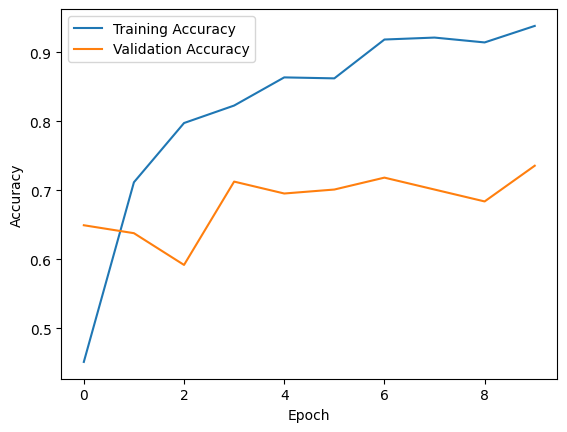

Found 885 images belonging to 8 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9403 - loss: 0.2506


In [9]:
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.applications import MobileNetV2
from keras._tf_keras.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


base_dir = '/content/tea sickness dataset'
img_size = (224, 224)
batch_size = 32

# Генератори даних
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Завантаження моделі
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Замороження базових шарів
base_model.trainable = False

# Додавання класифікаційного шару
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax')  # 8 класів
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Візуалізація результатів
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Оцінка на тестовій вибірці
test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset=None
)

model.evaluate(test_generator)

# Використання моделі
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_disease(img_path, model):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    return class_names[np.argmax(predictions)]




In [10]:
#!unzip "/content/tea sickness database" -d "/content"

In [13]:
img_path = '/content/listok.jpg'
result = predict_disease(img_path, model)
print(f"Predicted disease: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted disease: red leaf spot


In [12]:
import tensorflow as tf
print(tf.__version__)

2.17.1
